/var/folders/vg/pl6b7mc51j30tl7x990chf_c0000gn/T/ipykernel_22696/516268079.py:9: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.

/Users/ghulom97/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/ghulom97/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



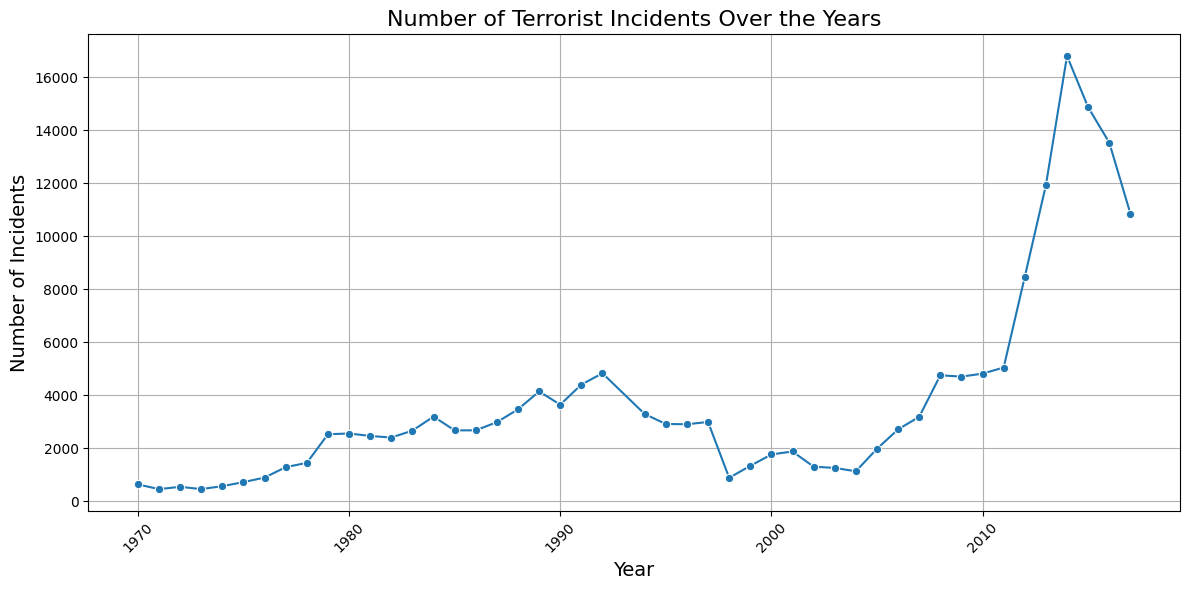

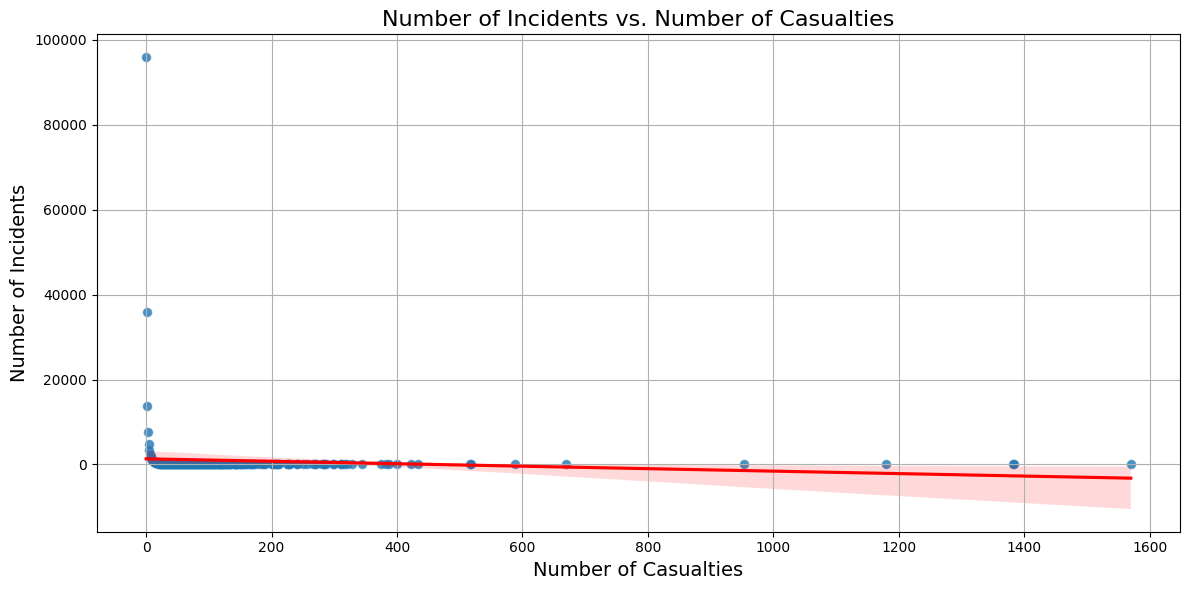

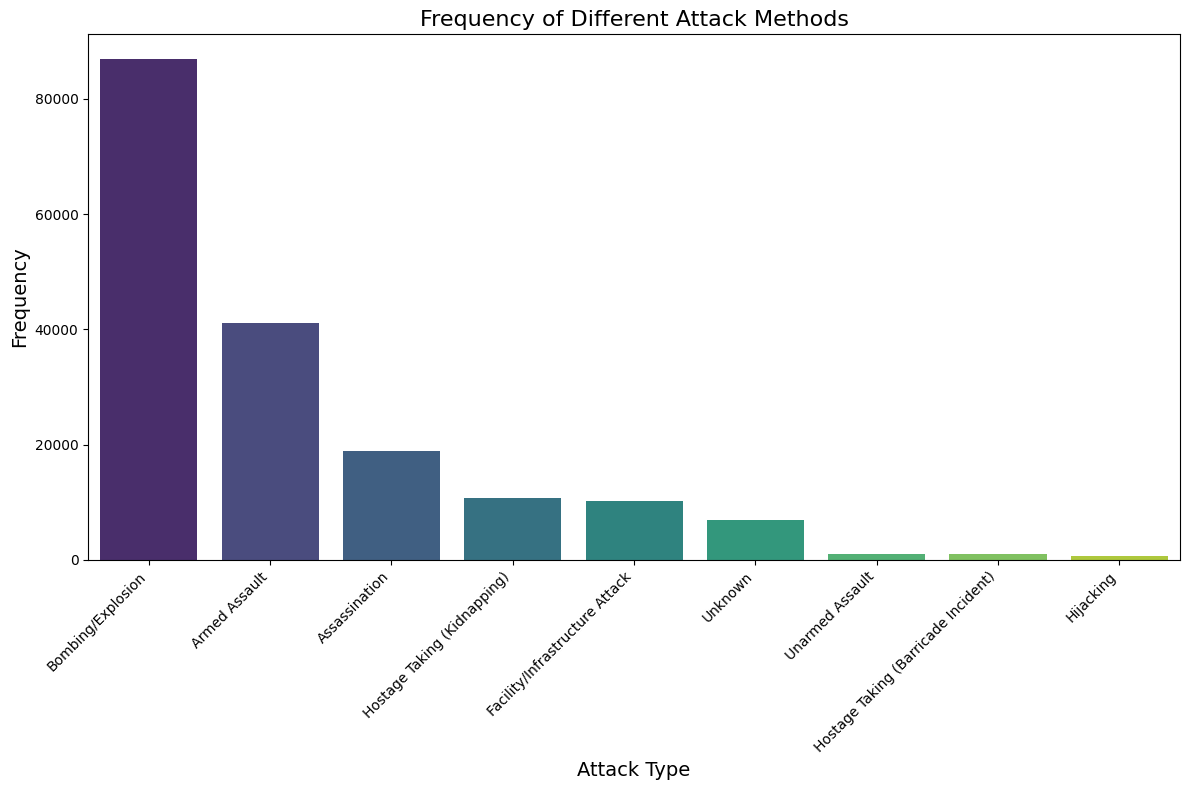

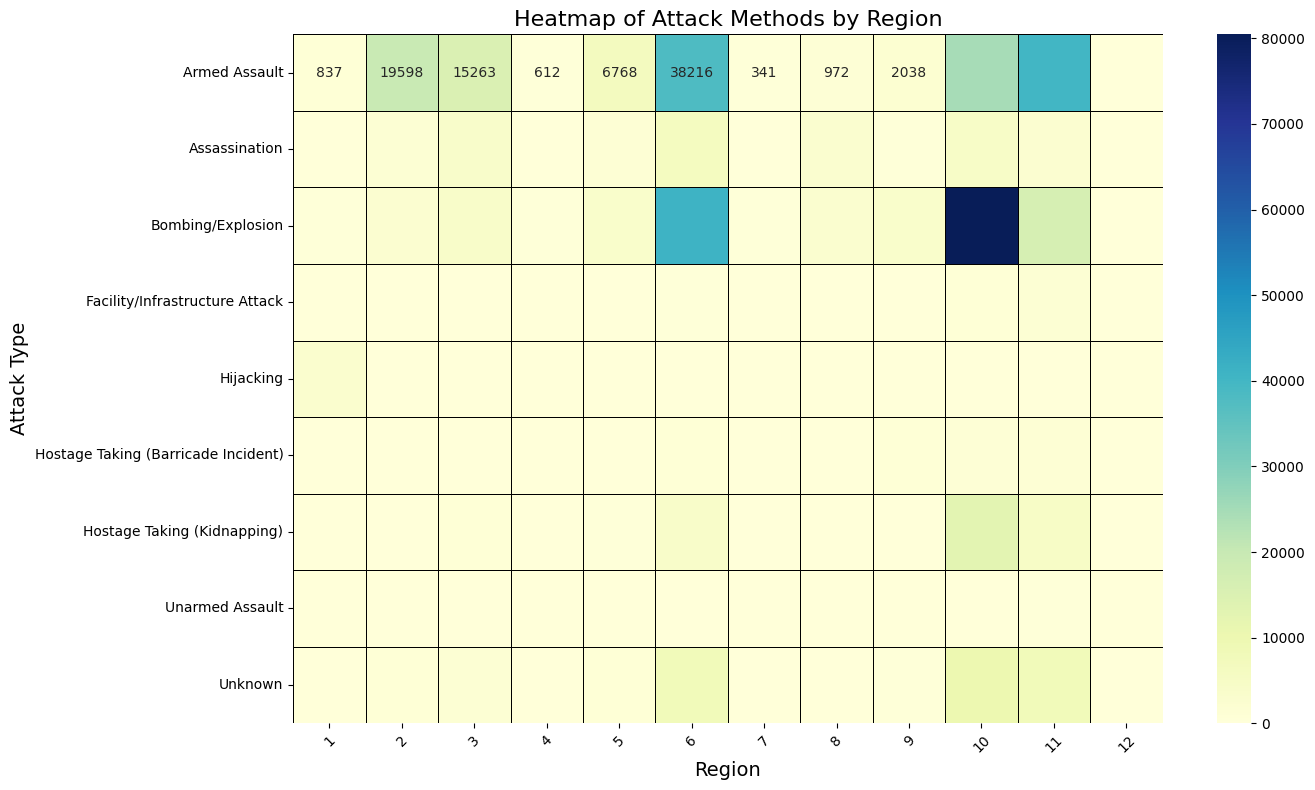

/var/folders/vg/pl6b7mc51j30tl7x990chf_c0000gn/T/ipykernel_22696/516268079.py:92: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



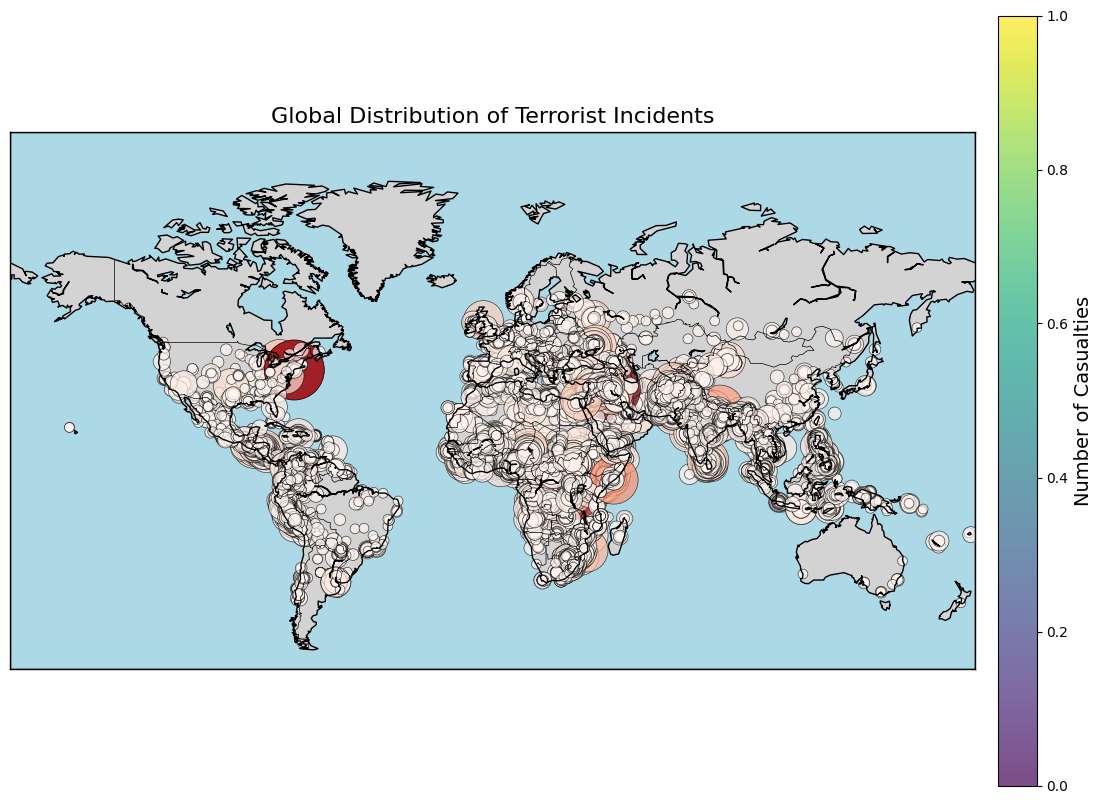

In [27]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import numpy as np

# Load the dataset
df = pd.read_csv("/Users/ghulom97/Downloads/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

# Data cleaning
df = df.dropna(subset=['latitude', 'longitude'])
df['iyear'] = df['iyear'].astype(int)
df['imonth'] = df['imonth'].astype(int)
df['iday'] = df['iday'].astype(int)
df['nkill'] = df['nkill'].fillna(0).astype(int)

# Trend in Number of Terrorist Incidents Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('iyear').size(), marker='o')
plt.title('Number of Terrorist Incidents Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation Between Incidents and Casualties
casualties_count = df['nkill'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(x=casualties_count.index, y=casualties_count.values, alpha=0.6)
sns.regplot(x=casualties_count.index, y=casualties_count.values, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Number of Incidents vs. Number of Casualties', fontsize=16)
plt.xlabel('Number of Casualties', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Most Common Methods of Attack
attack_types = df['attacktype1_txt'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=attack_types.index, y=attack_types.values, palette='viridis')
plt.title('Frequency of Different Attack Methods', fontsize=16)
plt.xlabel('Attack Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Attack Methods by Region
if 'region' in df.columns:
    pivot_table = df.pivot_table(index='attacktype1_txt', columns='region', values='nkill', aggfunc='sum', fill_value=0)
    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d', linewidths=0.5, linecolor='black')
    plt.title('Heatmap of Attack Methods by Region', fontsize=16)
    plt.xlabel('Region', fontsize=14)
    plt.ylabel('Attack Type', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'region' not found. Skipping heatmap of attack methods by region.")

# Geographic Distribution of Terrorist Incidents
# Create a new figure
fig, ax = plt.subplots(figsize=(15, 10))

# Set up Basemap
m = Basemap(projection='mill', 
            llcrnrlat=-60, urcrnrlat=90, 
            llcrnrlon=-180, urcrnrlon=180, 
            resolution='c', ax=ax)

# Draw map elements
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgrey', lake_color='lightblue')

# Normalize 'nkill' values for better visualization
norm = plt.Normalize(vmin=df['nkill'].min(), vmax=df['nkill'].max())
cmap = plt.get_cmap('Reds')

# Plotting the data
x, y = m(df['longitude'].values, df['latitude'].values)
sizes = np.sqrt(df['nkill'].values) * 50  # Adjust size scale
colors = cmap(norm(df['nkill'].values))

# Scatter plot on the map
scatter = m.scatter(x, y, c=colors, s=sizes, edgecolor='k', alpha=0.7, cmap=cmap, linewidth=0.5)

# Add colorbar with a title
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Number of Casualties', fontsize=14)

# Title and labels
plt.title('Global Distribution of Terrorist Incidents', fontsize=16)

# Show the plot
plt.show()


/var/folders/vg/pl6b7mc51j30tl7x990chf_c0000gn/T/ipykernel_22696/774031642.py:31: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



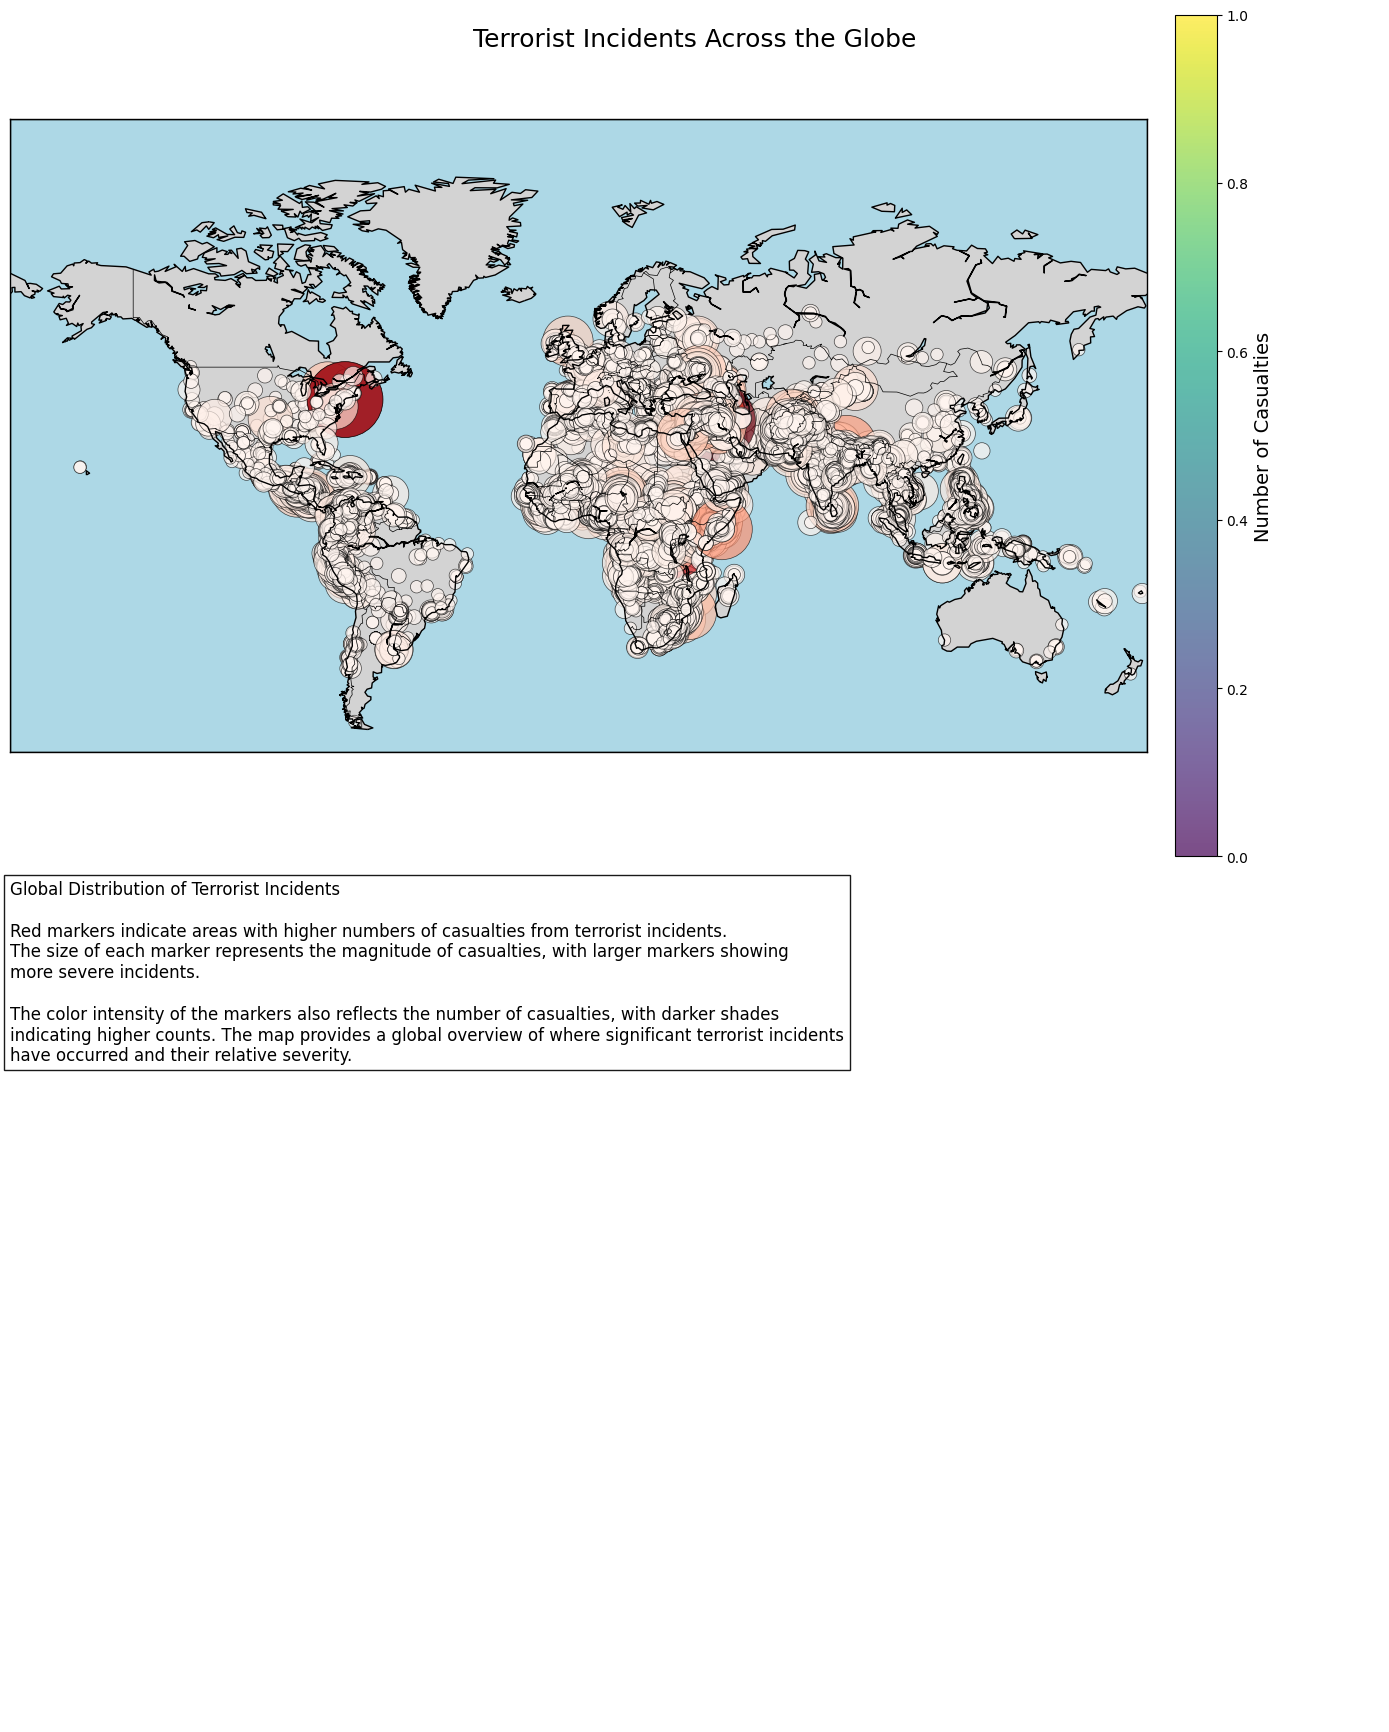

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

# Create a new figure with a larger map and text below it
fig = plt.figure(figsize=(14, 18))  # Adjusted figure size to accommodate the text below

# Create the map subplot
ax_map = fig.add_subplot(2, 1, 1)  # Top subplot for the map
m = Basemap(projection='mill',
            llcrnrlat=-60, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c', ax=ax_map)

# Draw map elements
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgrey', lake_color='lightblue')

# Normalize 'nkill' values for better visualization
norm = plt.Normalize(vmin=df['nkill'].min(), vmax=df['nkill'].max())
cmap = plt.get_cmap('Reds')

# Plotting the data
x, y = m(df['longitude'].values, df['latitude'].values)
sizes = np.sqrt(df['nkill'].values) * 80  # Adjust size scale
colors = cmap(norm(df['nkill'].values))

# Scatter plot on the map
scatter = m.scatter(x, y, c=colors, s=sizes, edgecolor='k', alpha=0.7, cmap=cmap, linewidth=0.5)

# Add colorbar with a title
cbar = plt.colorbar(scatter, ax=ax_map, orientation='vertical', pad=0.02)
cbar.set_label('Number of Casualties', fontsize=14)

# Create the text subplot
ax_text = fig.add_subplot(2, 1, 2)  # Bottom subplot for the text
ax_text.axis('off')  # Hide the axis

# Add explanatory text
explanation = (
    "Global Distribution of Terrorist Incidents\n\n"
    "Red markers indicate areas with higher numbers of casualties from terrorist incidents.\n"
    "The size of each marker represents the magnitude of casualties, with larger markers showing\n"
    "more severe incidents.\n\n"
    "The color intensity of the markers also reflects the number of casualties, with darker shades\n"
    "indicating higher counts. The map provides a global overview of where significant terrorist incidents\n"
    "have occurred and their relative severity."
)

ax_text.text(0, 1, explanation, fontsize=12, ha='left', va='top', bbox=dict(facecolor='white', alpha=0.9, edgecolor='black'))

# Add a title for the whole figure
fig.suptitle('Terrorist Incidents Across the Globe', fontsize=18, y=0.95)

# Adjust layout to make space for the text below the map
plt.tight_layout(rect=[0, 0, 1, 0.99])  # Ensure space for the text below the map

# Show the plot
plt.show()
